# План семинара
- Функционалы и метрики
- Кросс-валидация
- Переобучение и регуляризация
- Гиперпараметры и их оптимизация

# Функционалы и метрики

Quick recap

Функционал (или функция потерь == loss function)  - это функция, позволяющая обучить модель (то есть то, что мы стараемся оптимизировать, подбирая параметры модели - в случае линейной регрессии параметры - это веса)

Метрика - это оценка качества модели, которую можно использовать к любым моделям (позволяет ответить на вопрос, насколько точно модель может предсказывать целевую переменную)

Пример: Чтобы обучить линейную регрессию мы можем минизировать функционал MSE

Если мы имеем n наблюдений и k признаков

$\Sigma_{i=0}^{n}(\hat y_{i} - y_{i})^{2} \rightarrow min_{w}$

где $\hat y_{i} = \Sigma_{i=0}^{k}w_{k}X_{ik}$

А как метрику можем использовать RMSE

$RMSE = \sqrt{\Sigma_{i=0}^{n}(\hat y_{i} - y_{i})^{2}}$

Фундаментальное различие функционала и метрик в том, что метрика должна отражать нашу бизнес-задачу или научный вопрос, а функционал должен быть подобран так, чтобы он лучше лучше всего помогал достичь цель (позволял достичь наилучшных показателей метрики или метрик)

Аналогия из обучения в вышке: Чтобы сдать матан, мы можем учить производные различных функций, то есть тогда наш функционал - это количество производных, которые мы знаем. А метрикой того, что мы сдали матан будет являться оценка, полученная в конце курса.

Оценка в курсе - это понятная метрика, которую нам дал мир. А является ли зубрежка производных лучшим функционалом для достижения поставленной цели решать уже вам, как исследователям

И еще, хотя функционал и метрики - это разные по смыслу и использованию инструменты, они могут быть считаться одинаково (то есть к примеру обучать линейную регрессию можно обучать с помощью функционала MSE, и проверять качество тоже можно с помощью MSE)

In [1]:
# pip install scikit-learn

import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import load_diabetes 

In [2]:
np.random.seed(42)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
a, b = 2, 3
a, b

(2, 3)

In [5]:
X, y = load_diabetes(return_X_y=True,as_frame=True, scaled=True)


In [6]:
X.sample(2, random_state = 42)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
287,0.045341,-0.044642,-0.006206,-0.015999,0.125019,0.125198,0.019187,0.034309,0.032432,-0.005220
211,0.092564,-0.044642,0.036907,0.021872,-0.024960,-0.016658,0.000779,-0.039493,-0.022517,-0.021788


In [7]:
y.sample(2, random_state = 42)

287    219.0
211     70.0
Name: target, dtype: float64

In [8]:
round(X.describe(), 3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000
mean,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000
std,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048
min,-0.107,-0.045,-0.090,-0.112,-0.127,-0.116,-0.102,-0.076,-0.126,-0.138
25%,-0.037,-0.045,-0.034,-0.037,-0.034,-0.030,-0.035,-0.039,-0.033,-0.033
50%,0.005,-0.045,-0.007,-0.006,-0.004,-0.004,-0.007,-0.003,-0.002,-0.001
75%,0.038,0.051,0.031,0.036,0.028,0.030,0.029,0.034,0.032,0.028
max,0.111,0.051,0.171,0.132,0.154,0.199,0.181,0.185,0.134,0.136


In [9]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [10]:
# Разобьем данные на обучающую и тестовую выборки

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


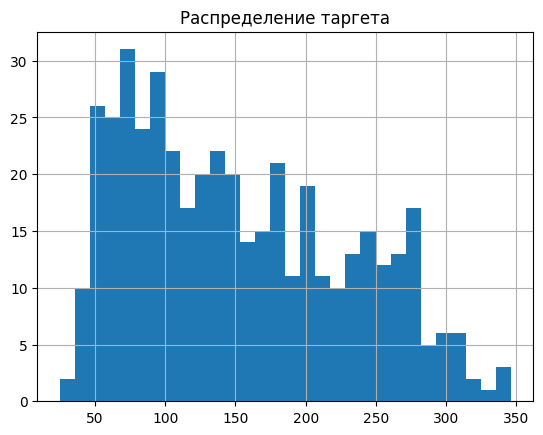

In [11]:
from matplotlib import pylab as plt
%pylab inline

plt.hist(y, bins = 30)
plt.title('Распределение таргета')
plt.grid()

Как было рассказано на лекции, линейную регрессию можно обучать с помощью разного функционала (не только MSE, который мы разбирали на прошлом семинаре) и оценивать с помощью разных метрик - закодим это 

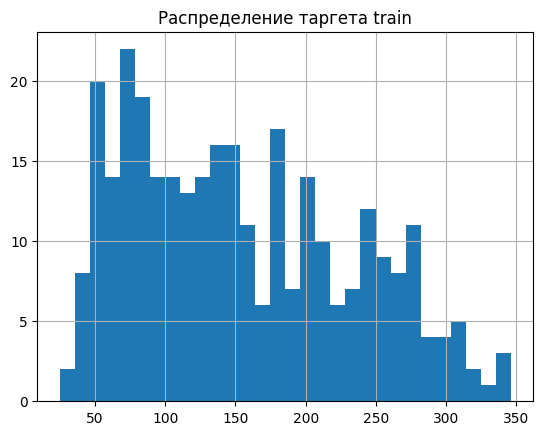

In [12]:
plt.hist(y_train, bins = 30)
plt.title('Распределение таргета train')
plt.grid()

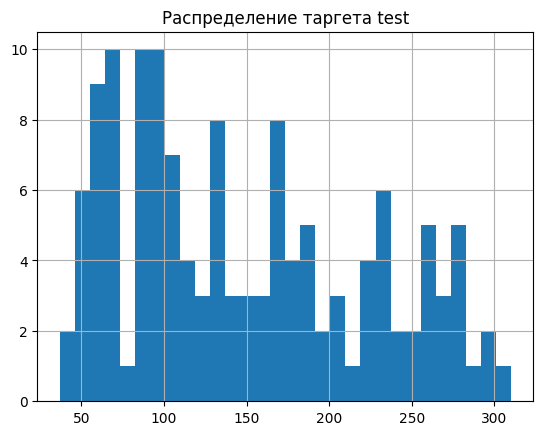

In [13]:
plt.hist(y_test, bins = 30)
plt.title('Распределение таргета test')
plt.grid()

In [14]:
len(y_test)/len(y), len(y_train)/len(y)

(0.3009049773755656, 0.6990950226244343)

In [15]:
X_test_mini = X_test.iloc[:2]

In [16]:
X_test_mini

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
287,0.045341,-0.044642,-0.006206,-0.015999,0.125019,0.125198,0.019187,0.034309,0.032432,-0.005220
211,0.092564,-0.044642,0.036907,0.021872,-0.024960,-0.016658,0.000779,-0.039493,-0.022517,-0.021788


In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr_mse = SGDRegressor(max_iter=50000) # MSE
lr_mae = SGDRegressor(loss='epsilon_insensitive', epsilon=0, max_iter=50000) # MAE

lr_mse.fit(X_train, y_train)
lr_mae.fit(X_train, y_train)

y_pred_mse = lr_mse.predict(X_test)
y_pred_mae = lr_mae.predict(X_test)

print(f'''MSE loss: 
mae={mean_absolute_error(y_test, y_pred_mse)}
mse={mean_squared_error(y_test, y_pred_mse)}
R2={r2_score(y_test, y_pred_mse)}
''')

print(f'''MAE loss: 
mae={mean_absolute_error(y_test, y_pred_mae)}
mse={mean_squared_error(y_test, y_pred_mae)}
R2={r2_score(y_test, y_pred_mae)}
''')

print(f'''MSE loss TRAIN: 
mae={mean_absolute_error(y_train, lr_mse.predict(X_train))}
mse={mean_squared_error(y_train, lr_mse.predict(X_train))}
R2={r2_score(y_train, lr_mse.predict(X_train))}
''')



MSE loss: 
mae=41.86893154424368
mse=2807.335530384132
R2=0.47996008115636235

MAE loss: 
mae=62.03608513023826
mse=5495.977630367117
R2=-0.018092682520026715

MSE loss TRAIN: 
mae=45.04116583116694
mse=2991.8648964617228
R2=0.5133819534983864



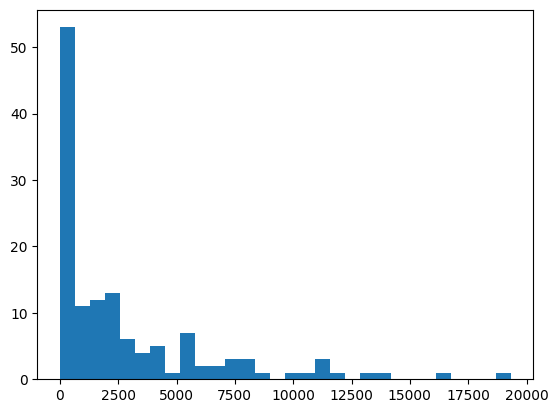

In [18]:
plt.hist((y_test-y_pred_mse)**2, bins=30)
plt.show()

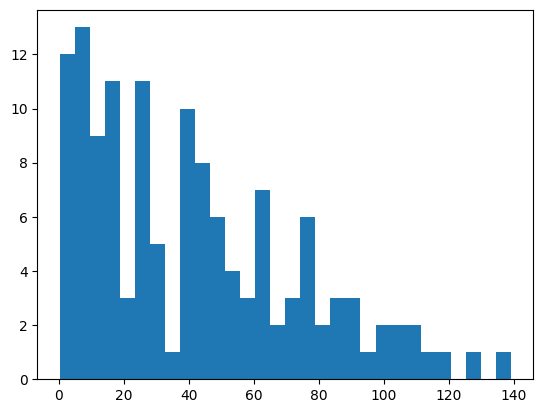

In [19]:
plt.hist(np.abs((y_test-y_pred_mse)), bins=30)
plt.show()

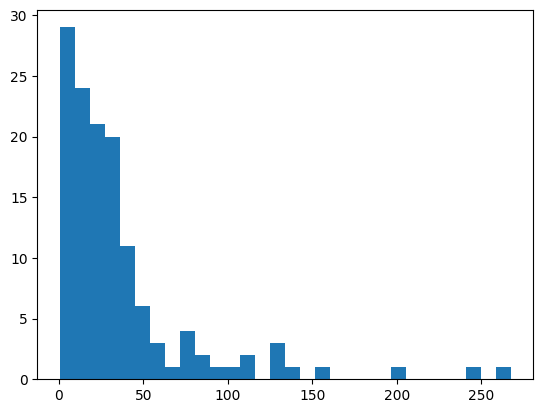

In [20]:
plt.hist(np.abs((y_test-y_pred_mse)/y_test * 100), bins=30)
plt.show()

In [21]:
X_test.iloc[(np.abs((y_test-y_pred_mse)/y_test)).argmax()]

age   -0.041840
sex   -0.044642
bmi    0.041218
bp    -0.026328
s1    -0.031840
s2    -0.030437
s3    -0.036038
s4     0.002943
s5     0.033654
s6    -0.017646
Name: 56, dtype: float64

Как мы говорили раньше, метрика должна отражать реальную цель из мира, поэтому нередко возникает потребность в написании своих собственных метрик, которые лучше описывают вашу конретную реальность. В задачах, связанных с медициной (как у нас сейчас), довольно высокая цена ошибки (у человека есть диабет, а мы его не нашли). Поэтому для того, чтобы ответить на вопрос, можно ли модель использовать в жизни, имеет смысл использовать метрику максимальной ошибки модели

$max error = max(|\hat y_{i} - y_{i}|)$

In [22]:
a = [120, 130, 156, 183, 194, 201]

In [23]:
np.sum(a)/6

np.float64(164.0)

In [24]:
def max_error(y_true, y_pred):
    max_erorr = np.abs(y_true - y_pred).max()
    return max_erorr

def quantile_error(y_true, y_pred, q=0.95):
    q_error = np.quantile(np.abs(y_true -  y_pred), q)
    return q_error

# Оценим максимальную ошибку в обоих случаях

print(f'MSE Loss: {max_error(y_test, y_pred_mse)}')
print(f'MAE Loss: {max_error(y_test, y_pred_mae)}')

MSE Loss: 139.02179932203123
MAE Loss: 175.53028401386527


BTW, в sklearn есть большое количество уже реализованных метрик - можете посмотреть их список и варианты применения здесь

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

#  Кросс-валидация

Когда выбран функционал и метрика, можно задаться вопросом: а насколько я могу доверять полученным результатам (значениям метрики), не являются ли они случайности или совпадением ? Кросс-валидация - это инструмент для ответа на этот вопрос.

In [25]:
from sklearn.model_selection import cross_validate, cross_val_score

здесь можно посмотреть какие параметры требуются для этой функции
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html

In [26]:
# проверим на кросс-валидации значения ошибок MSE, MAE, R2 
# для линейной регрессии, обученной с помощью функционала MSE

num_splits=5

cv_res = cross_validate(lr_mse,
                     X,
                     y,
                     scoring='neg_mean_squared_error', # метрика, которую нужно оценить
                     cv=num_splits, # количество разбиений или класс-сплиттер
                     verbose = 4
                    )

print(f"test mse errors are {cv_res['test_score']}")
print(f"mean test mse = {cv_res['test_score'].mean()}")

[CV] END ..................................., score=-3000.681 total time=   0.0s
[CV] END ..................................., score=-3037.547 total time=   0.1s
[CV] END ..................................., score=-3167.148 total time=   0.1s
[CV] END ..................................., score=-2896.149 total time=   0.1s
[CV] END ..................................., score=-3017.713 total time=   0.1s
test mse errors are [-3000.68112445 -3037.54744157 -3167.14785392 -2896.14875641
 -3017.71294922]
mean test mse = -3023.8476251126585


In [27]:
cv_res

{'fit_time': array([0.04222298, 0.05605412, 0.05321288, 0.05283999, 0.06277299]),
 'score_time': array([0.00060081, 0.00061798, 0.00054622, 0.00054622, 0.00062799]),
 'test_score': array([-3000.68112445, -3037.54744157, -3167.14785392, -2896.14875641,
        -3017.71294922])}

In [28]:
# Проведем кросс-валидацию сразу для нескольких метрик

cv_res2 = cross_validate(lr_mse,
                     X,
                     y,
                     scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
                     cv=num_splits
                    )
print(f"""test mse errors are {cv_res2['test_neg_mean_squared_error']} 
and  mean mse = {cv_res2['test_neg_mean_squared_error'].mean()}
""")

print(f"""test mae errors are {cv_res2['test_neg_mean_absolute_error']} 
and  mean mae = {cv_res2['test_neg_mean_absolute_error'].mean()}
""")


print(f"""test R2 are {cv_res2['test_r2']} 
and  mean R2 = {cv_res2['test_r2'].mean()}
""")


test mse errors are [-2979.5690195  -3042.04669763 -3158.2106058  -2903.80036464
 -3039.5722748 ] 
and  mean mse = -3024.6397924759885

test mae errors are [-44.96889504 -44.98651586 -47.97754531 -42.71112063 -44.01910415] 
and  mean mae = -44.93263619612895

test R2 are [0.38858863 0.52051719 0.49537942 0.44650172 0.53025678] 
and  mean R2 = 0.4762487459081095



In [29]:
pd.DataFrame(cv_res2)

,fit_time,score_time,test_neg_mean_squared_error,test_neg_mean_absolute_error,test_r2
0,0.047758,0.000971,-2979.569020,-44.968895,0.388589
1,0.053371,0.001098,-3042.046698,-44.986516,0.520517
2,0.062501,0.000735,-3158.210606,-47.977545,0.495379
3,0.058662,0.000894,-2903.800365,-42.711121,0.446502
4,0.051257,0.001098,-3039.572275,-44.019104,0.530257


In [30]:
def max_error(y_true, y_pred):
    max_erorr = np.abs(y_true - y_pred).max()
    return max_erorr

In [31]:
# для тех, кто хочет хочет дополнительно подумать

# кросс-валидацию можно проводить на основе своей кастомной метрики, но для этого
# из нее нужно сделать объект scorer

from sklearn.metrics import make_scorer

max_error_scorer = make_scorer(max_error, greater_is_better=False)

cv_res3 = cross_validate(lr_mse,
                     X,
                     y,
                     scoring=max_error_scorer,
                     cv=num_splits
                    )
cv_res3['test_score']

array([-136.10881943, -161.08184672, -120.50815719, -128.65788561,
       -135.47853836])

# Немного feature engineering

Один из самых главных источников улучшения качества прогноза модели - это информативный набор признаков. Поэтому в попытке улучшить качество нашей модели обогатим наше признаковое пространство попарными произведениями признаков

In [32]:
import copy

cols = copy.deepcopy(X.columns)
print(cols)

for col1 in cols:
    for col2 in cols:
        col_name = col1 + '_x_' + col2
        if col_name not in X.columns:
            X[col_name] = X[col1]*X[col2]
X

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,...,s6_x_age,s6_x_sex,s6_x_bmi,s6_x_bp,s6_x_s1,s6_x_s2,s6_x_s3,s6_x_s4,s6_x_s5,s6_x_s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,...,-0.000672,-0.000894,-0.001089,-0.000386,0.000780,0.000614,0.000766,0.000046,-0.000351,0.000311
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,...,0.000174,0.004116,0.004746,0.002428,0.000779,0.001767,-0.006861,0.003641,0.006300,0.008502
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,...,-0.002212,-0.001314,-0.001153,0.000147,0.001182,0.000887,0.000839,0.000067,-0.000074,0.000672
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,...,0.000834,0.000418,0.000109,0.000343,-0.000114,-0.000234,0.000337,-0.000321,-0.000212,0.000088
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,...,-0.000251,0.002082,0.001697,-0.001020,-0.000184,-0.000727,-0.000380,0.000121,0.001492,0.002175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,...,0.000301,0.000365,0.000142,0.000431,-0.000041,-0.000018,-0.000207,-0.000019,0.000225,0.000052
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,...,-0.000245,0.002255,-0.000708,-0.003009,0.002195,0.003522,-0.001276,0.001526,-0.000806,0.001979
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,...,0.000646,0.000785,-0.000246,0.000268,-0.000578,-0.000214,-0.000387,-0.000172,-0.000726,0.000240
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,...,0.001179,0.001158,-0.001013,-0.000032,-0.000423,-0.000396,0.000744,-0.000689,-0.001155,0.000672


Переобучение - ситуация, когда модель хорошо выучила обучающую выборку, но при этом показывает гораздо более низкое качество точности на тестовых данных. Это можно интерпретровать как модель стала слишком специфичной и потеряла обобщающую способность

В случае линеной регрессии, одним из симптомов переобучения являются высокие значения весов. С этим борются регуляризацией.

Регуляризация Lasso или L1-регуляризация:

$Q_{lasso}(w) = Q(w) + \alpha \Sigma_{j=0}^{k}|w_{k}|$

Регуляризация Ridge или L2-регуляризация:

$Q_{ridge}(w) = Q(w) + \alpha \Sigma_{j=0}^{k}w_{k}^{2}$


Как было рассказано в лекции, несмотря на то, что оба вида регуляризации ведут к занижению значений весов, отличие регуляризации Lasso заключается в том, что она может привести часть весов к 0 (что эквивалетно безинформативности  соответствующего признака), в случае Ridge регрессии веса могут быть сколько угодно близки к 0, но никогда не равны.

Объяснение в лекции :)


# Переобучение и регуляризация

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [34]:
X_train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,...,s6_x_age,s6_x_sex,s6_x_bmi,s6_x_bp,s6_x_s1,s6_x_s2,s6_x_s3,s6_x_s4,s6_x_s5,s6_x_s6
174,0.016281,0.050680,0.009961,-0.043542,-0.096510,-0.094632,-0.039719,-0.039493,0.017036,0.007207,...,0.000117,0.000365,0.000072,-0.000314,-0.000695,-0.000682,-0.000286,-0.000285,0.000123,0.000052
213,0.001751,-0.044642,-0.070875,-0.022885,-0.001569,-0.001001,0.026550,-0.039493,-0.022517,0.007207,...,0.000013,-0.000322,-0.000511,-0.000165,-0.000011,-0.000007,0.000191,-0.000285,-0.000162,0.000052
389,-0.005515,0.050680,0.001339,-0.084856,-0.011201,-0.016658,0.048640,-0.039493,-0.041176,-0.088062,...,0.000486,-0.004463,-0.000118,0.007473,0.000986,0.001467,-0.004283,0.003478,0.003626,0.007755
87,0.045341,-0.044642,-0.006206,0.011544,0.063101,0.016222,0.096501,-0.039493,0.042897,-0.038357,...,-0.001739,0.001712,0.000238,-0.000443,-0.002420,-0.000622,-0.003701,0.001515,-0.001645,0.001471
352,0.012648,0.050680,-0.071952,-0.046985,-0.051103,-0.097137,0.118591,-0.076395,-0.020292,-0.038357,...,-0.000485,-0.001944,0.002760,0.001802,0.001960,0.003726,-0.004549,0.002930,0.000778,0.001471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,-0.012780,-0.044642,0.060618,0.052858,0.047965,0.029375,-0.017629,0.034309,0.070207,0.007207,...,-0.000092,-0.000322,0.000437,0.000381,0.000346,0.000212,-0.000127,0.000247,0.000506,0.000052
22,-0.085430,-0.044642,-0.004050,-0.009113,-0.002945,0.007767,0.022869,-0.039493,-0.061176,-0.013504,...,0.001154,0.000603,0.000055,0.000123,0.000040,-0.000105,-0.000309,0.000533,0.000826,0.000182
356,-0.005515,0.050680,-0.033151,-0.015999,0.008063,0.016222,0.015505,-0.002592,-0.028323,-0.075636,...,0.000417,-0.003833,0.002507,0.001210,-0.000610,-0.001227,-0.001173,0.000196,0.002142,0.005721
221,-0.045472,-0.044642,-0.038540,-0.026328,-0.015328,0.000878,-0.032356,-0.002592,0.001148,-0.038357,...,0.001744,0.001712,0.001478,0.001010,0.000588,-0.000034,0.001241,0.000099,-0.000044,0.001471


In [38]:
lr_mse.fit(X_train, y_train)

pred = lr_mse.predict(X_test)

mean_squared_error(y_test, pred)

2797.5075407843765

In [39]:
# альфа - это гиперпараметр, посмотрим как зависят значения весов от него

from sklearn.linear_model import Lasso

for a in np.arange(0, 1.1, 0.25):
    if a == 0:
        a += 0.00000001
    lasso = Lasso(alpha=a)
    lasso.fit(X_train, y_train)

    y_pred_tr = lasso.predict(X_train)
    y_pred2 = lasso.predict(X_test)

    print('alpha={}'.format(a))
    print('Train MSE:', mean_squared_error(y_train, y_pred_tr))
    print('Test MSE:', mean_squared_error(y_test, y_pred2))
    print(lasso.coef_,'\n')

alpha=1e-08
Train MSE: 2390.1655057722983
Test MSE: 3949.83521194994
[ 1.27443044e+02 -1.50504091e+01  3.47460896e+02  4.07803941e+02
 -1.91151047e+02  1.14283421e+02 -4.60936010e+02 -4.11680738e+01
  5.25985653e+02  8.36335981e+01  1.62594006e+03  3.33910035e+03
 -4.13183210e+02  4.32120982e+03 -7.17930959e+03  1.22403977e+03
  6.85685374e+03  6.86524687e+03  1.21508347e+03  2.81463966e+02
 -8.12679699e+02 -5.35705044e+04 -2.04189623e+03  1.78458429e+03
  4.95404102e+03 -2.75612102e+03 -1.80815468e+03 -6.72787942e+03
  2.95459310e+03  1.44726042e+03 -7.47518172e+02 -8.15925232e+02
  7.55340405e+01  2.74098104e+03 -1.22870614e+04  1.02634670e+04
  7.24508641e+03 -9.92015397e+02  6.78605753e+03  8.20298510e+02
 -4.41745921e+02 -8.66144399e+02 -2.95940383e+02  1.03120690e+03
  6.72415886e+03 -7.90493488e+03 -4.20156428e+03 -2.05777226e+03
 -5.48318976e+03 -5.72783891e+02 -5.57236737e+03  6.10860130e+03
 -1.17478657e+04  1.49230476e+04  2.80562765e+03  1.73946032e+02
 -1.31717694e+04 -1.6

In [40]:
X.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       ...
       's6_x_age', 's6_x_sex', 's6_x_bmi', 's6_x_bp', 's6_x_s1', 's6_x_s2',
       's6_x_s3', 's6_x_s4', 's6_x_s5', 's6_x_s6'],
      dtype='object', length=110)

In [44]:
lasso = Lasso(alpha=0.25)
lasso.fit(X_train, y_train)

Lasso(alpha=0.25)

In [46]:
pd.DataFrame(zip(X.columns, lasso.coef_)).head(15)

,0,1
0,age,0.000000
1,sex,-68.393327
2,bmi,450.145920
3,bp,260.512675
4,s1,-0.000000
5,s2,-0.000000
6,s3,-213.683229
7,s4,0.000000
8,s5,399.955401
9,s6,4.791096


In [47]:
# альфа - это гиперпараметр, посмотрим как зависят значения весов от него

from sklearn.linear_model import Ridge

for a in np.arange(0, 1.1, 0.25):
    if a == 0:
        a += 0.00000001
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)

    y_pred_tr = ridge.predict(X_train)
    y_pred2 = ridge.predict(X_test)

    print('alpha={}'.format(a))
    print('Train MSE:', mean_squared_error(y_train, y_pred_tr))
    print('Test MSE:', mean_squared_error(y_test, y_pred2))
    print(ridge.coef_,'\n')

alpha=1e-08
Train MSE: 2377.7400387350253
Test MSE: 3966.916740306791
[ 1.33826953e+02 -3.45589558e+02  3.58187558e+02  3.99780740e+02
 -8.18753940e+03  7.18046184e+03  2.50604362e+03 -1.06876839e+02
  3.18096722e+03  9.24627695e+01  1.55792120e+03  1.18089442e+03
 -6.86418896e+02  1.92081210e+03 -5.46800277e+03 -2.94782478e-02
  5.48794193e+03  5.59146045e+03  1.33161991e+03  5.31258628e+02
  1.18089442e+03 -2.08683482e+00 -1.49917504e+03  4.14693304e+02
  7.44984331e+03 -4.34274038e+03 -4.56396404e+03 -4.90918738e+03
 -4.13189445e+02  6.97673460e+02 -6.86418896e+02 -1.49917504e+03
 -4.65764124e+01  1.30117297e+03 -9.22179375e+03  7.89455956e+03
  4.66572662e+03  1.10510086e+03  4.53759470e+03 -8.89748736e+01
  1.92081210e+03  4.14693303e+02  1.30117297e+03  1.01534699e+03
  9.05904073e+03 -6.94777175e+03 -5.00134377e+03 -6.88714490e+02
 -4.06838228e+03 -1.02636022e+03 -5.46800277e+03  7.44984331e+03
 -9.22179375e+03  9.05904072e+03  9.20658332e+04 -6.29038107e+04
 -5.56467133e+04 -2.

А какой коэффициент альфа лучший ? И нужна ли здесь регуляризация ?

Чтобы ответить на этот вопрос мы можем с помощью кросс-валидации перебрать различные значения альфы и выбрать лучшее значение. Этот процесс называется оптимизацией гиперпараметров. Альфа является гиперпараметром, потому что задача оптимизации функционала не позволяет найти ее оптимальное значение (в отличие от весов регрессии).

In [52]:
from sklearn.linear_model import LassoCV

n_alphas = 200
alphas = np.linspace(1e-10, 5, n_alphas)

lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso_cv.fit(X, y)

print(f'Optimal alpha value is {lasso_cv.alpha_}')


Optimal alpha value is 0.025125628240201005


In [49]:
# Более общий способ использования кросс-валидации для поиска лучшего набора гиперпараметров


from sklearn.model_selection import GridSearchCV

params = {'alpha':alphas,}

#print(params)
cv = GridSearchCV(lasso,
                  params,
                  scoring='r2',
                  cv=num_splits
                 )
cv.fit(X, y)

print(cv.best_params_)

{'alpha': np.float64(0.025125628240201005)}


In [50]:
pd.DataFrame(cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.022888,0.004369,0.000968,0.000113,1.000000e-10,{'alpha': 1e-10},0.374011,0.532243,0.447966,0.088060,0.476719,0.383800,0.156425,32
1,0.001750,0.000093,0.000656,0.000118,2.512563e-02,{'alpha': 0.025125628240201005},0.420838,0.520400,0.492165,0.432448,0.544555,0.482081,0.048347,1
2,0.001590,0.000131,0.000669,0.000082,5.025126e-02,{'alpha': 0.05025125638040201},0.414919,0.519239,0.491511,0.441288,0.543241,0.482040,0.047718,2
3,0.001737,0.000115,0.000673,0.000067,7.537688e-02,{'alpha': 0.07537688452060301},0.408844,0.517860,0.490503,0.447690,0.541514,0.481282,0.047805,3
4,0.001569,0.000249,0.000573,0.000034,1.005025e-01,{'alpha': 0.10050251266080401},0.401952,0.515022,0.488770,0.452689,0.538919,0.479470,0.048189,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.001425,0.000115,0.000648,0.000121,4.899497e+00,{'alpha': 4.899497487439196},-0.098448,-0.027867,-0.000533,-0.008342,-0.002340,-0.027506,0.036772,93
196,0.001539,0.000135,0.000706,0.000080,4.924623e+00,{'alpha': 4.924623115579397},-0.098448,-0.027867,-0.000533,-0.008342,-0.002340,-0.027506,0.036772,93
197,0.001425,0.000066,0.000606,0.000024,4.949749e+00,{'alpha': 4.9497487437195975},-0.098448,-0.027867,-0.000533,-0.008342,-0.002340,-0.027506,0.036772,93
198,0.001513,0.000165,0.000677,0.000070,4.974874e+00,{'alpha': 4.974874371859799},-0.098448,-0.027867,-0.000533,-0.008342,-0.002340,-0.027506,0.036772,93


Больше про то, как задавать поле поиска и какие еще есть методы оптимизации гиперпараметров можете прочитать здесь

https://scikit-learn.org/stable/modules/grid_search.html